In [18]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_test, y_train = y_test.ravel(), y_train.ravel()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [19]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
    ]
labels_dict = {i: label for i, label in enumerate(labels)}

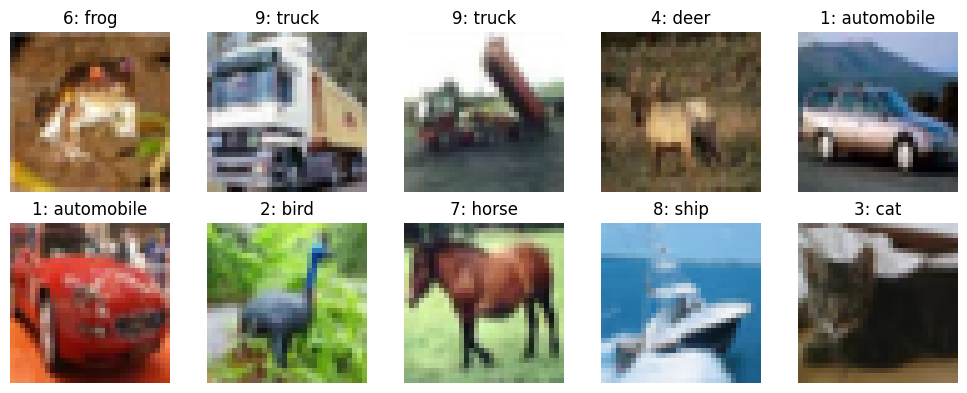

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()

In [21]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

In [22]:
from keras import layers

def CNN_model(learning_rate = 0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)

    model = keras.Sequential(name="CNN")

    for kern in kernels:
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation="relu", kernel_initializer="he_normal",
                                   input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model


In [23]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

2024-11-25 10:53:10.451309: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/raphael/ITHS/AI23/AI23-Deep-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/100


2024-11-25 10:57:29.777781: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2695 - loss: 1.9440 - val_accuracy: 0.4626 - val_loss: 1.4932
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4476 - loss: 1.5130 - val_accuracy: 0.5356 - val_loss: 1.2942
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5009 - loss: 1.3713 - val_accuracy: 0.5886 - val_loss: 1.1751
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5371 - loss: 1.2789 - val_accuracy: 0.5977 - val_loss: 1.1254
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5655 - loss: 1.1992 - val_accuracy: 0.6120 - val_loss: 1.0901
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5847 - loss: 1.1560 - val_accuracy: 0.6299 - val_loss: 1.0491
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6067 - loss: 1.1049 - val_accuracy: 0.6520 - val_loss: 0.9960
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6188 - loss: 1.0647 - val_

In [25]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.337425,1.765900,0.4626,1.493228
1,0.460100,1.480291,0.5356,1.294222
2,0.507850,1.355658,0.5886,1.175102
3,0.543725,1.263221,0.5977,1.125429
4,0.570150,1.193406,0.6120,1.090136


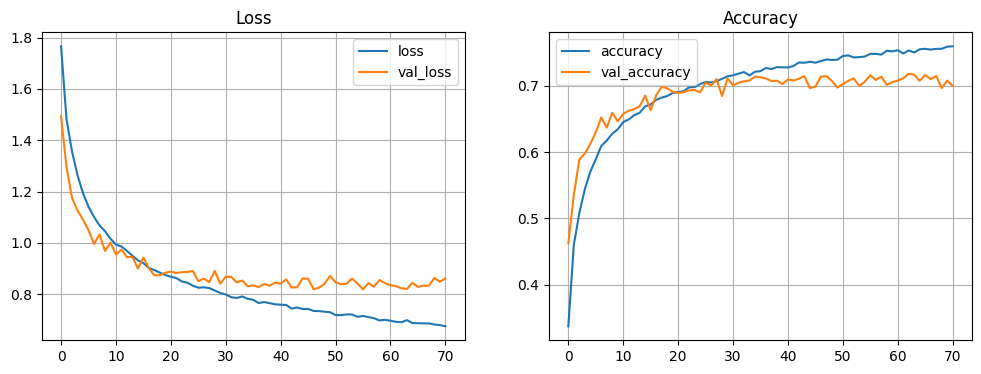

In [27]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

In [36]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train,
              y_train,
              validation_split=1/6,
              epochs=20,
              callbacks=[early_stopper]
    )
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_accuracy"].iloc[-1]
    return val_acc

In [32]:
import numpy as np
np.arange(.1, .6, .1)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [37]:
import numpy as np
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

Epoch 1/20


2024-11-25 11:30:28.190870: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3907 - loss: 1.7058 - val_accuracy: 0.5816 - val_loss: 1.1977
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5939 - loss: 1.1548 - val_accuracy: 0.6333 - val_loss: 1.0433
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6624 - loss: 0.9555 - val_accuracy: 0.6419 - val_loss: 1.0058
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7060 - loss: 0.8308 - val_accuracy: 0.6604 - val_loss: 0.9793
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7586 - loss: 0.6937 - val_accuracy: 0.6919 - val_loss: 0.9075
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8029 - loss: 0.5714 - val_accuracy: 0.6927 - val_loss: 0.9245
Epoch 7/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8275 - loss: 0.4957 - val_accuracy: 0.6939 - val_loss: 0.9776
Epoch 8/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8563 - loss: 0.4123 - val_acc

2024-11-25 11:32:03.342763: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4165 - loss: 1.6152 - val_accuracy: 0.5948 - val_loss: 1.1327
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6286 - loss: 1.0615 - val_accuracy: 0.6577 - val_loss: 0.9766
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6916 - loss: 0.8929 - val_accuracy: 0.6523 - val_loss: 0.9897
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7376 - loss: 0.7527 - val_accuracy: 0.7053 - val_loss: 0.8579
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7734 - loss: 0.6391 - val_accuracy: 0.7031 - val_loss: 0.8875
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8085 - loss: 0.5434 - val_accuracy: 0.7078 - val_loss: 0.9022
Epoch 7/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8401 - loss: 0.4632 - val_accuracy: 0.7094 - val_loss: 0.9316
Epoch 8/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8679 - loss: 0.3760 - val_acc

2024-11-25 11:33:30.219711: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3943 - loss: 1.6887 - val_accuracy: 0.5822 - val_loss: 1.1822
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5997 - loss: 1.1303 - val_accuracy: 0.6356 - val_loss: 1.0310
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6610 - loss: 0.9640 - val_accuracy: 0.6820 - val_loss: 0.9275
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7034 - loss: 0.8421 - val_accuracy: 0.7028 - val_loss: 0.8645
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7379 - loss: 0.7444 - val_accuracy: 0.7090 - val_loss: 0.8476
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7688 - loss: 0.6479 - val_accuracy: 0.7022 - val_loss: 0.8817
Epoch 7/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7936 - loss: 0.5878 - val_accuracy: 0.7097 - val_loss: 0.8632
Epoch 8/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8264 - loss: 0.4962 - val_a

In [38]:
model_final = CNN_model(drop_rate = .2)

model_final.fit(scaled_X_train, y_train, epochs = 20)



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4191 - loss: 1.6085
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6229 - loss: 1.0764
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.8866
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7377 - loss: 0.7481
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7703 - loss: 0.6469
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8152 - loss: 0.5298
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8412 - loss: 0.4524
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8658 - loss: 0.3845
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8821 - loss: 0.3362
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8973 - loss: 0.2918
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9092 - loss: 0.2584
Epoch 12/20
1563/15

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.82      0.83      0.82      1000
           2       0.61      0.57      0.59      1000
           3       0.59      0.41      0.49      1000
           4       0.62      0.75      0.68      1000
           5       0.63      0.59      0.61      1000
           6       0.71      0.84      0.77      1000
           7       0.78      0.74      0.76      1000
           8       0.81      0.82      0.82      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

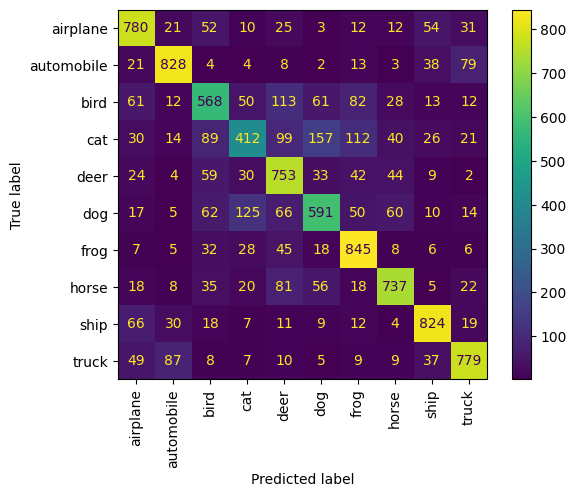

In [40]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model_final.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90)